<a href="https://colab.research.google.com/github/aruna09/Predict-Music-Genre/blob/main/Music_Genre_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the dataset from Google Drive:☜(ﾟヮﾟ☜)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing required libraries:👩‍🏫

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

### Reading Training and Testing Data👩‍💻

In [ ]:
path = "/content/drive/My Drive/EilyLilly-Data-Scientist/dataset"
os.chdir(path)

In [ ]:
train = pd.read_csv('train.csv',error_bad_lines=False)
test = pd.read_csv('test.csv',error_bad_lines=False)
submission = pd.read_csv('sample_submission.csv',error_bad_lines=False)

data = train

In [ ]:
data.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


In [ ]:
data.isna().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

###Visualization

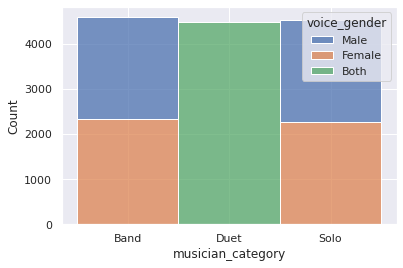

In [ ]:
plot = sns.histplot(data=data, x='musician_category', hue='voice_gender', multiple='stack')
sns.set(rc = {'figure.figsize':(8,8)})

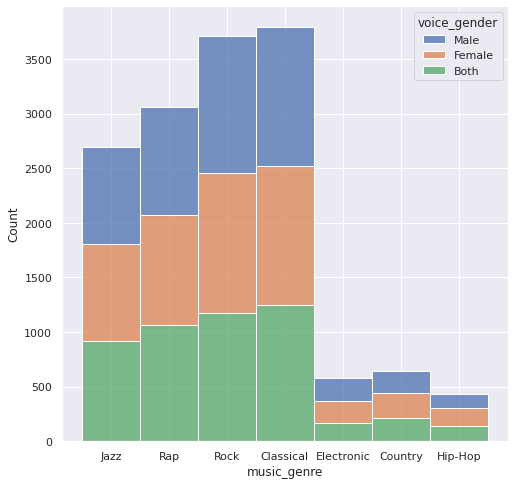

In [ ]:
plot = sns.histplot(data=data, x='music_genre', hue='voice_gender', multiple='stack')
sns.set(rc = {'figure.figsize':(8,8)})

### Imputing missing values and Feature Encoding👩‍💻

These methods can be used for both the Train and Test Set.

1. Substitute Question Marks:

    During Preliminary analysis it was observed that few feature columns have "?" instead of their actual values. Replacing these will be a good first step.

In [ ]:
def substitute_question_marks_NA(data):
  data = data.replace("?", 0)
  return data

### These preprocessing steps are exclusively used for the Training Set

1. Drop Null Rows: Dropping null rows, for the categorical columns- musician_category and mode.

2. Drop insignificant columns: Dropping insignificant columns- instance_id and track_name

3. Impute NA values in Train Set: Handling/Imputing other null values in all the features. This includes all numeric values, which are first grouped on the basis of musician_category and music_genre, post which the mean value of the formed group is replaced. This type of encoding where the target variable is involved helps transfer important features to the encoded variable. 

In [ ]:
def drop_null_rows(data):
  data.dropna(subset=['musician_category', 'mode'])
  return data

In [ ]:
def drop_insignificant_columns(data):
  data = data.drop(['instance_id', 'track_name'], axis=1)
  return data

In [ ]:
def impute_na_values_train_set(data):
  data['popularity'] = data['popularity'].fillna(data.groupby(['music_genre', 'musician_category'])['popularity'].transform('mean'))
  data['danceability'] = data['danceability'].fillna(data.groupby(['music_genre', 'musician_category'])['danceability'].transform('mean'))
  data['duration_ms'] = data['duration_ms'].fillna(data.groupby(['music_genre', 'musician_category'])['duration_ms'].transform('mean'))
  data['energy'] = data['energy'].fillna(data.groupby(['music_genre', 'musician_category'])['energy'].transform('mean'))
  data['instrumentalness'] = data['instrumentalness'].fillna(data.groupby(['music_genre', 'musician_category'])['instrumentalness'].transform('mean'))
  data['loudness'] = data['loudness'].fillna(data.groupby(['music_genre', 'musician_category'])['loudness'].transform('mean'))
  data['speechiness'] = data['speechiness'].fillna(data.groupby(['music_genre', 'musician_category'])['speechiness'].transform('mean'))
  data['valence'] = data['valence'].fillna(data.groupby(['music_genre', 'musician_category'])['valence'].transform('mean'))

  return data

### These preprocessing steps are exclusively used for the Test Set.

1. Impute NA values in Test Set: Handling/Imputing other null values in all the features. 

  This includes all numeric values, which are first grouped on the basis of musician_category, post which the mean value of the formed group is replaced.

In [ ]:
def impute_na_test_set(data):
  data['popularity'] = data['popularity'].fillna(data.groupby(['musician_category'])['popularity'].transform('mean'))
  data['danceability'] = data['danceability'].fillna(data.groupby(['musician_category'])['danceability'].transform('mean'))
  data['duration_ms'] = data['duration_ms'].fillna(data.groupby(['musician_category'])['duration_ms'].transform('mean'))
  data['energy'] = data['energy'].fillna(data.groupby(['musician_category'])['energy'].transform('mean'))
  data['instrumentalness'] = data['instrumentalness'].fillna(data.groupby(['musician_category'])['instrumentalness'].transform('mean'))
  data['loudness'] = data['loudness'].fillna(data.groupby(['musician_category'])['loudness'].transform('mean'))
  data['speechiness'] = data['speechiness'].fillna(data.groupby(['musician_category'])['speechiness'].transform('mean'))
  data['valence'] = data['valence'].fillna(data.groupby(['musician_category'])['valence'].transform('mean'))

  data = data.replace(np.nan, 0)
  return data

### Imputing Categorical Variables

  1. Imputing Voice_gender: As clear in the visualizations, the spread of all categories is pretty uniform and hence, we use python's random function to impute these missing values.

  2. Impute Categorical Values: Using Label Encoder to encode all categorical values

In [ ]:
import random

def impute_voice_gender(data):
  data.loc[data['musician_category'] == "Duet", 'voice_gender'] = data.loc[data['musician_category'] == "Duet", 'voice_gender'].fillna("Both")
  data.loc[data['musician_category'] == "Band", 'voice_gender'] = data.loc[data['musician_category'] == "Band", 'voice_gender'].fillna(random.choice(['Male', 'Female']))
  data.loc[data['musician_category'] == "Solo", 'voice_gender'] = data.loc[data['musician_category'] == "Solo", 'voice_gender'].fillna(random.choice(['Male', 'Female']))
  return data

In [ ]:
def impute_categorical_variables(data):
  data['key'] = data['key'].astype(str)
  le.fit(data['key'])
  data['key'] = le.transform(data['key'])

  data['musician_category'] = data['musician_category'].astype(str)
  le.fit(data['musician_category'])
  data['musician_category'] = le.transform(data['musician_category'])

  data['mode'] = data['mode'].astype(str)
  le.fit(data['mode'])
  data['mode'] = le.transform(data['mode'])

  data['voice_gender'] = data['voice_gender'].astype(str)
  le.fit(data['voice_gender'])
  data['voice_gender'] = le.transform(data['voice_gender'])

  return data

In [ ]:
def impute_categorical_variables_test(data):
  data['key'] = data['key'].astype(str)
  le.fit(data['key'])
  data['key'] = le.transform(data['key'])

  data['musician_category'] = data['musician_category'].astype(str)
  le.fit(data['musician_category'])
  data['musician_category'] = le.transform(data['musician_category'])

  data['mode'] = data['mode'].astype(str)
  le.fit(data['mode'])
  data['mode'] = le.transform(data['mode'])

  data['voice_gender'] = data['voice_gender'].astype(str)
  le.fit(data['voice_gender'])
  data['voice_gender'] = le.transform(data['voice_gender'])

  return data

In [ ]:
def target_variable_encoding(data):
  data = data.replace("Jazz", 0)
  data = data.replace("Rap", 1)
  data = data.replace("Rock", 2)
  data = data.replace("Country", 3)
  data = data.replace("Hip-Hop", 4)
  data = data.replace("Electronic", 5)
  data = data.replace("Classical", 6)
  return data

### Utility Code

1. convert dtype to float: Converting Data to a uniform type

2. Dropping all Null Rows

In [ ]:
def convert_dtype_tofloat64(data):
  for column in list(data):
    data[column] = data[column].astype(float)
  clean_dataset(data)
  return data

In [ ]:
def drop_all_na_rows(data):
  data = data.dropna()
  return data

### Standardizing Data

In [ ]:
def standardize_data(data):
  scaler = preprocessing.StandardScaler().fit(data)
  #scaler = RobustScaler().fit(data)
  X_scaled = scaler.transform(data)
  return X_scaled

### Clean Dataset

In [ ]:
def clean_dataset(df):
  df.dropna(inplace=True)
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
  return df[indices_to_keep].astype(np.float64)

### Normalizing Data

In [ ]:
import numpy as np

def normalize_data(data):
  X_normalized = preprocessing.normalize(data, norm='l2')
  return X_normalized

### Preprocessing Train set

In [ ]:
data = drop_insignificant_columns(data)

data = drop_null_rows(data)
data = substitute_question_marks_NA(data)
data = impute_na_values_train_set(data)
data = impute_voice_gender(data)
data = impute_categorical_variables(data)
data = target_variable_encoding(data)
data = drop_all_na_rows(data)

data = convert_dtype_tofloat64(data)
data = clean_dataset(data)
# data.iloc[:, 0:15] = standardize_data(data.iloc[:, 0:15])
# data.iloc[:, 0:15] = normalize_data(data.iloc[:, 0:15])

### Preprocessing Test Set

In [ ]:
test = substitute_question_marks_NA(test)
test = impute_na_test_set(test)
test = impute_voice_gender(test)
test = impute_categorical_variables(test)
test = target_variable_encoding(test)
test = test.reset_index()
test.iloc[:, 3:18] = convert_dtype_tofloat64(test.iloc[:, 3:18])
# test.iloc[:, 3:18] = standardize_data(test.iloc[:, 3:18])
# test.iloc[:, 3:18] = normalize_data(test.iloc[:, 3:18])

### Model Building

#### Partitioning data into train and test set

In [ ]:
X_train = data.iloc[:, 0: 15]
y_train = data.iloc[:, -1]

X_test = test.iloc[:, 3:]

#### Importing necessary libraries

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn import svm
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier

## Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_train, y_train)

Regressive Feature Elimination

In [ ]:
#Selecting the Best important features according to Logistic Regression
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 6, step = 1)
clf = rfe_selector.fit(X_train, y_train)
clf.score(X_train, y_train)

In [ ]:
y_test = clf.predict(X_test)

Gaussian Naive Bayes = 50.41

In [ ]:
gnb = GaussianNB()
y_test = gnb.fit(X_train, y_train).predict(X_test)

KNN = 47.07

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)
y_test = neigh.predict(X_test)

Decision Trees = 48.2

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_test = clf.predict(X_test)
#tree.plot_tree(clf)

Random Forest = 40.99

In [ ]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_test = clf.predict(X_test)

SVM = 56.92

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_test = clf.predict(X_test)

XGBoost = 58.33

In [ ]:
pip install xgboost

In [ ]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
y_test = xgb_cl.predict(X_test)

Model Stacking = 55.28

In [ ]:
base_models = list()
base_models.append(('KNNC', KNeighborsClassifier(n_neighbors = len(np.unique(y_train)) , weights = 'distance')))
base_models.append(('SVC', SVC(kernel = 'linear', class_weight = 'balanced', break_ties = True)))    
base_models.append(('GNB', GaussianNB()))
base_models.append(('RF', RandomForestClassifier(n_estimators= 200, oob_score = True, class_weight = "balanced", random_state = 20, ccp_alpha = 0.1)))

##Base estimators which will be stacked together
meta_model = LogisticRegression()
final_model = StackingClassifier(estimators = base_models, final_estimator = meta_model, cv = 5)
final_model.fit(X_train, y_train)
y_test = final_model.predict(X_test)

### Submission

#### Mapping the target variable to genre categories

In [ ]:
y_test = pd.DataFrame(y_test)
y_test =y_test.replace(0, "Jazz")
y_test =y_test.replace(1, "Rap")
y_test =y_test.replace(2, "Rock")
y_test =y_test.replace(3, "Country")
y_test =y_test.replace(4, "Hip-Hop")
y_test =y_test.replace(5, "Electronic")
y_test =y_test.replace(6, "Classical")

df = pd.DataFrame()
df['instance_id'] = test.instance_id
df['music_genre'] = y_test

#### Creating the submission CSV file

In [ ]:
submission_csv = pd.DataFrame({'instance_id':df.instance_id, 'music_genre': df.music_genre})
submission_csv.to_csv(path+'submission_file.csv', index=False)